In [2]:
# Gerekli library'ler
from google.cloud import bigquery as bq
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.colors as colors
import plotly.subplots as sp
import plotly.express as px
warnings.filterwarnings("ignore", category=UserWarning)
c = bq.Client.from_service_account_json("denizerendeg505.json")

#### Retention Rate

In [2]:
# 2021 May icin retention rate pivot tablosu

query = """ 
WITH
  event_days AS (
    SELECT
      user_id,
      event_time,
      DATE(event_time) AS event_day 
    FROM
      `casedreamgames.case_db.q1_table_session`  
    WHERE
    event_time BETWEEN '2021-05-01' AND '2021-06-01' 
  )

  ,
  cohort_days AS (
    SELECT
      user_id,
      MIN(event_day) AS CohortDay  
    FROM
      event_days
    GROUP BY
      user_id
  ),
  cohort_index_calculations AS (
    SELECT
      ed.user_id,
      ed.event_day,
      cd.CohortDay,
      DATE_DIFF(ed.event_day, cd.CohortDay, DAY)+1 AS CohortIndex 
    FROM
      event_days ed
    JOIN
      cohort_days cd
    ON
      ed.user_id = cd.user_id
  ),
  cohort_counts AS (
    SELECT
      CohortDay,
      CohortIndex,
      COUNT(DISTINCT user_id) AS unique_users 
    FROM
      cohort_index_calculations
    GROUP BY
      CohortDay,
      CohortIndex
  )
  
SELECT
  *
FROM
  cohort_counts
PIVOT (
  MAX(unique_users) FOR CohortIndex IN (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
  18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31)  -- CohortIndex 
)

ORDER BY
  CohortDay;


"""

retention_data = c.query(query).to_dataframe()
retention_data.set_index('CohortDay', inplace=True)
retention_data = retention_data.astype(float)
cohort_sizes = retention_data.iloc[:,0]
retention = retention_data.divide(cohort_sizes, axis=0).round(3)*100
retention.index = pd.to_datetime(retention.index)
retention.index = retention.index.to_series().dt.strftime('%b %d')
retention.columns = retention.columns.str.replace('^_', '', regex=True)
retention

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
CohortDay,,,,,,,,,,,,,,,,,,,,,
May 01,100.0,58.1,48.9,45.7,44.0,40.3,39.5,40.0,39.3,36.9,...,32.9,33.0,32.3,31.2,31.2,30.8,31.1,31.0,31.5,30.6
May 02,100.0,55.6,47.9,45.9,41.2,40.1,40.8,40.2,36.5,36.0,...,32.7,31.8,30.8,30.7,29.9,29.8,30.6,30.6,30.0,NaN
May 03,100.0,52.6,47.5,41.7,40.0,38.9,38.3,36.6,35.4,34.6,...,30.3,29.4,29.1,28.9,29.1,28.7,29.1,29.1,NaN,NaN
May 04,100.0,56.3,45.4,42.8,41.6,40.5,37.1,37.4,36.4,35.2,...,30.5,30.6,30.3,29.9,29.8,29.7,30.0,NaN,NaN,NaN
May 05,100.0,53.0,47.4,44.0,43.0,39.9,38.5,37.7,36.8,35.6,...,30.7,30.4,29.9,30.0,30.3,29.9,NaN,NaN,NaN,NaN
May 06,100.0,55.9,47.5,44.4,41.7,40.6,38.7,38.2,37.1,35.7,...,30.9,30.6,29.2,29.2,29.9,NaN,NaN,NaN,NaN,NaN
May 07,100.0,54.9,47.6,44.0,42.7,40.6,39.0,38.2,37.4,37.2,...,31.4,31.2,30.6,31.0,NaN,NaN,NaN,NaN,NaN,NaN
May 08,100.0,56.6,45.9,42.5,41.9,39.3,38.3,39.8,38.4,35.8,...,32.1,31.6,30.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
May 09,100.0,54.8,46.7,44.1,42.1,41.1,41.3,41.0,37.7,36.7,...,33.0,31.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


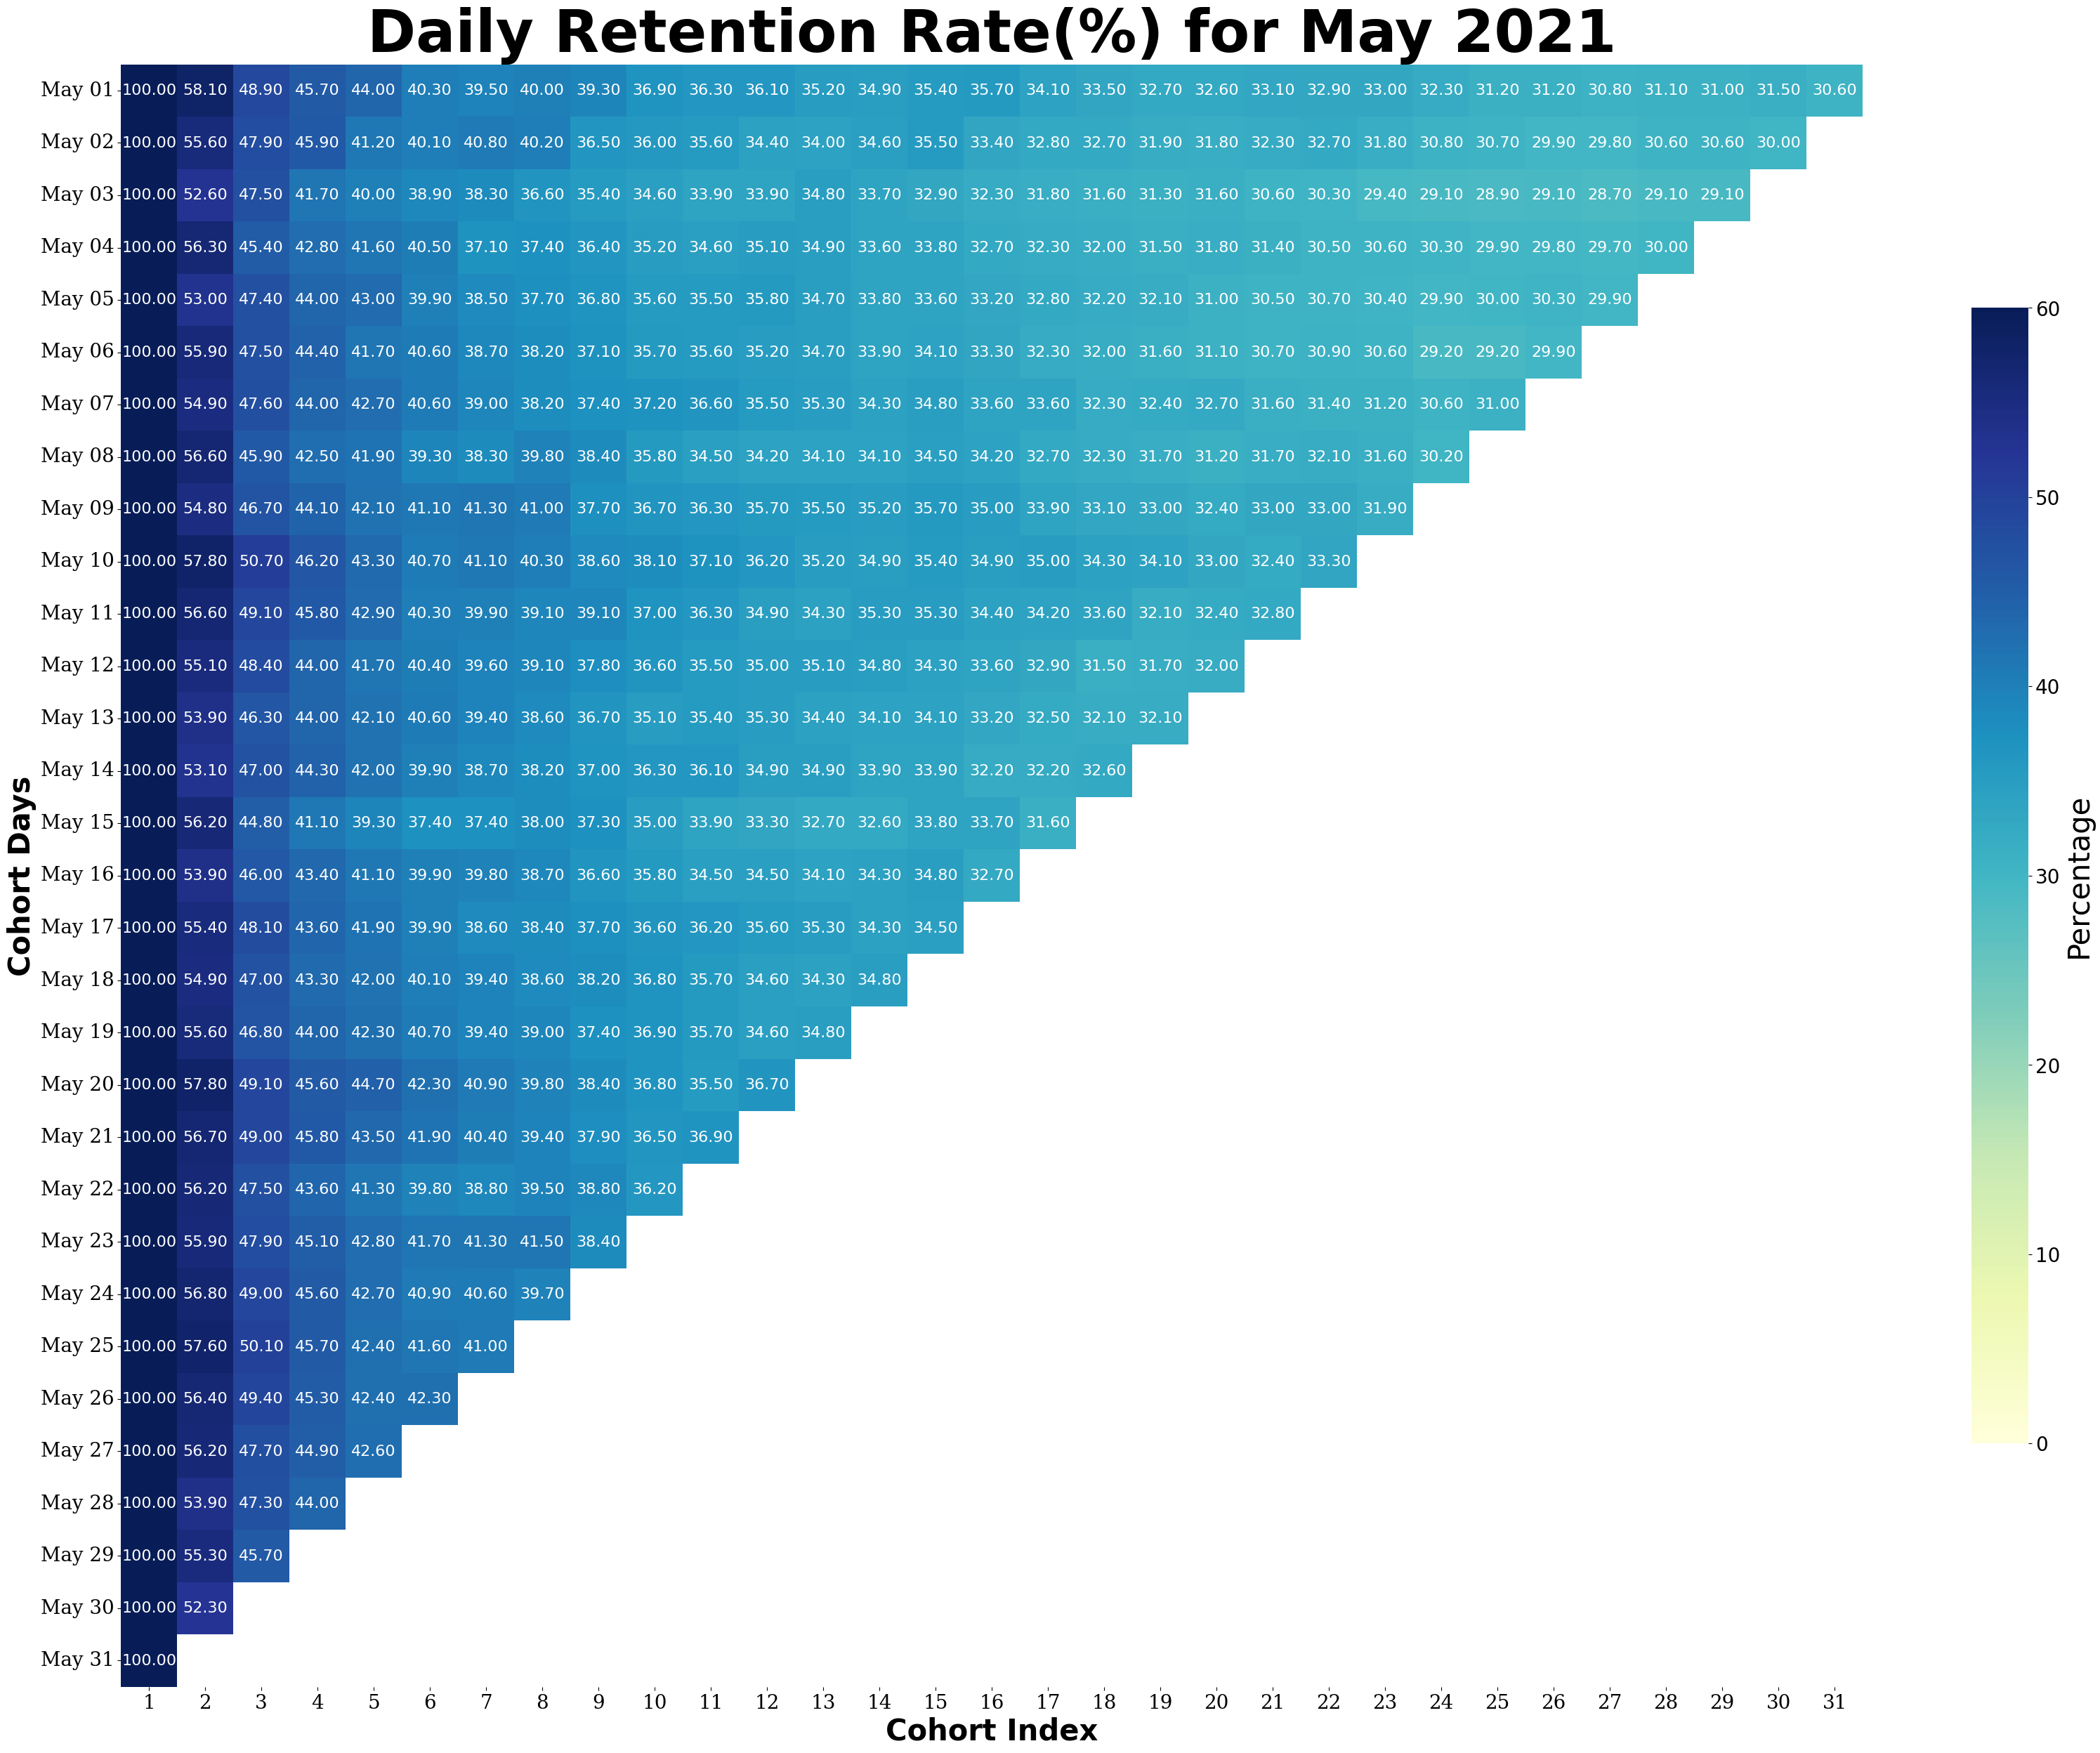

In [3]:

plt.figure(figsize=(40, 30))


ax = sns.heatmap(
    retention, 
    annot=True, 
    fmt='.2f', 
    cmap='YlGnBu', 
    vmin=0.0, 
    vmax=60.0,
    annot_kws={"size": 16}, 
    cbar_kws={"shrink": 0.7, "orientation": "vertical"}  
)


cbar = ax.collections[0].colorbar


cbar.ax.set_ylabel('Percentage', fontsize=30)  
cbar.ax.tick_params(labelsize=20)  

plt.title(
    'Daily Retention Rate(%) for May 2021', 
    fontsize=60, 
    fontdict={'family': 'sans-serif', 'weight': 'bold', 'size': 60}
)


plt.xlabel(
    'Cohort Index', 
    fontsize=30, 
    fontdict={'family': 'sans-serif', 'weight': 'bold', 'size': 30}
)
plt.ylabel(
    'Cohort Days', 
    fontsize=30, 
    fontdict={'family': 'sans-serif', 'weight': 'bold', 'size': 30}
)


plt.yticks(rotation=0, fontsize=20, fontfamily='serif')


plt.xticks(fontsize=20, fontfamily='serif')


plt.show()


#### Kullanicilar tarafindan oyunda gecirilen ortalama gunluk saat

In [8]:
query = """ 
WITH daily_stats AS (
    SELECT
        DATE(event_time) AS event_date, 
        COUNT(DISTINCT user_id) AS num_users,  
        SUM(time_spent) AS total_time_spent  
    FROM
        `casedreamgames.case_db.q1_table_session`
    WHERE
        event_time BETWEEN '2021-05-01' AND '2021-06-01' 
    GROUP BY
        event_date
)

SELECT
    event_date,
    (total_time_spent / num_users)/3600 AS avg_hours_spent_per_user  
FROM
    daily_stats
ORDER BY
    event_date;

"""

df_hours = c.query(query).to_dataframe()
df_hours['event_date'] = pd.to_datetime(df_hours['event_date'])
df_hours['is_weekend'] = df_hours['event_date'].dt.dayofweek >= 5
df_hours['group_id'] = (df_hours['is_weekend'] != df_hours['is_weekend'].shift()).cumsum()
df_hours['group_type'] = np.where(df_hours['is_weekend'] == 1, 'Weekend', 'Weekday')
grouped = df_hours.groupby(['group_type', 'group_id']).agg({'avg_hours_spent_per_user': 'mean'}).reset_index()
grouped['group_label'] = grouped.groupby('group_type').cumcount() + 1
grouped['group_label'] = grouped['group_type'] + ' ' + grouped['group_label'].astype(str)

In [3]:
fig = go.Figure()


weekday_data = df_hours[df_hours['is_weekend'] == 0]
fig.add_trace(go.Scatter(
    x=weekday_data['event_date'],
    y=weekday_data['avg_hours_spent_per_user'],
    mode='markers+lines',
    marker=dict(size=10, symbol='x', color='blue', line=dict(width=2, color='black')),
    text=weekday_data['avg_hours_spent_per_user'],
    textposition='top center',
    name='Weekday'
))


weekend_data = df_hours[df_hours['is_weekend'] == 1]
fig.add_trace(go.Scatter(
    x=weekend_data['event_date'],
    y=weekend_data['avg_hours_spent_per_user'],
    mode='markers+lines',
    marker=dict(size=10, symbol='x', color='red', line=dict(width=2, color='black')),
    text=weekend_data['avg_hours_spent_per_user'],
    textposition='top center',
    name='Weekend'
))


fig.update_xaxes(
    tickformat='%b %d',  
    dtick="D1",  
    tickangle=45  
)


fig.update_layout(
    title='Average hours spent per user in weekends and weekdays (May 2021)',
    title_font=dict(size=30, family="Arial, sans-serif"), 
    xaxis_title='Date',
    yaxis_title='Average Hours Spent Per User',
    xaxis_title_font=dict(size=20, family="Arial, sans-serif"),  
    yaxis_title_font=dict(size=20, family="Arial, sans-serif"),  
    xaxis=dict(showgrid=False, gridcolor='white'),  
    yaxis=dict(showgrid=False, gridcolor='white'),  
    paper_bgcolor='white',  
    plot_bgcolor='white',  
    title_x=0.5,  
    margin=dict(l=40, r=40, t=40, b=40)  
)


for _, row in grouped.iterrows():
    fig.add_annotation(
        x=df_hours[df_hours['group_id'] == row['group_id']]['event_date'].mean(),
        y=row['avg_hours_spent_per_user'],
        text=row['group_label'],
        showarrow=True,
        arrowhead=2,
        ax=0,
        ay=-40
    )


fig.show()

#### Seviyelere gore harcanan ortalama zaman

In [15]:
query = """ 
WITH level_totals AS (
  SELECT
    level,
    SUM(time_spent) AS total_time_spent,
    COUNT(DISTINCT user_id) AS distinct_users
  FROM
    `casedreamgames.case_db.q1_table_session`
  WHERE level != 2750
  GROUP BY
    level
),

average_time_per_level AS (
  SELECT
    level,
    total_time_spent / distinct_users AS avg_time_per_user
  FROM
    level_totals
)

SELECT
  level,
  avg_time_per_user
FROM
  average_time_per_level
ORDER BY
  level;

"""

df_level_time = c.query(query).to_dataframe()
bins = range(1, df_level_time['level'].max() + 50, 50)
labels = [f'{i}-{i + 49}' for i in bins[:-1]]
df_level_time['level_group'] = pd.cut(df_level_time['level'], bins=bins, labels=labels, right=False)
df_level_time = df_level_time.groupby('level_group', observed=True)['avg_time_per_user'].mean().reset_index()
df_level_time
# graph5.pkl

,level_group,avg_time_per_user
0,1-50,169.359592
1,51-100,209.494822
2,101-150,236.920465
3,151-200,394.818906
4,201-250,450.640963
5,251-300,442.781931
6,301-350,477.190128
7,351-400,433.336087
8,401-450,427.280532
9,451-500,446.367582


In [23]:

fig = go.Figure(data=[
    go.Bar(
        x=df_level_time['level_group'],  
        y=df_level_time['avg_time_per_user'],  
        marker=dict(color='royalblue'),  
        text=df_level_time['avg_time_per_user'].round(1), 
        textposition='auto',  
    )
])


fig.update_layout(
    title='Average Time Spent per User by Level Group',
    title_font=dict(size=30, family="Arial, sans-serif"),  
    xaxis_title='Level Group',
    yaxis_title='Average Time Spent per User (seconds)',
    xaxis_title_font=dict(size=20, family="Arial, sans-serif"),  
    yaxis_title_font=dict(size=20, family="Arial, sans-serif"),  
    xaxis=dict(showgrid=False, gridcolor='white'),  
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),  
    paper_bgcolor='white',  
    plot_bgcolor='white', 
    title_x=0.5, 
    margin=dict(l=40, r=40, t=40, b=40),  
    bargap=0.15,  
    bargroupgap=0.1
)


fig.show()

In [17]:
query = """ 
WITH level_totals AS (
    SELECT
        level,
        COUNTIF(status = 'win') AS total_wins,
        COUNTIF(status = 'quit') AS total_quits,
        COUNTIF(status = 'fail') AS total_fails,
        SUM(moves_made) AS total_moves_made,
        SUM(moves_left) AS total_moves_left,
        COUNT(DISTINCT user_id) AS distinct_users
    FROM
        casedreamgames.case_db.q1_table_level_end
    GROUP BY
        level
)
SELECT
    level,
    distinct_users,
    ROUND(total_wins / distinct_users, 2) AS avg_wins_per_user,
    ROUND(total_quits / distinct_users, 2) AS avg_quits_per_user,
    ROUND(total_fails / distinct_users, 2) AS avg_fails_per_user,
    ROUND(total_moves_made / distinct_users, 2) AS avg_movesmade_per_user,
    ROUND(total_moves_left / distinct_users, 2) AS avg_movesleft_per_user
FROM
    level_totals
ORDER BY
    level;


"""

df_level_status = c.query(query).to_dataframe()
bins = range(1, df_level_status['level'].max() + 50, 50)
labels = [f'{i}-{i + 49}' for i in bins[:-1]]
df_level_status['level_group'] = pd.cut(df_level_status['level'], bins=bins, labels=labels, right=False)
df_level_status = df_level_status.groupby('level_group', observed=True)[['avg_movesmade_per_user',
                                          'avg_movesleft_per_user', 
                                          'avg_wins_per_user',
                                          'avg_quits_per_user',
                                          'avg_fails_per_user']].mean().reset_index()
df_level_status
# graph6.pkl

,level_group,avg_movesmade_per_user,avg_movesleft_per_user,avg_wins_per_user,avg_quits_per_user,avg_fails_per_user
0,1-50,37.6098,6.4178,0.9960,0.0036,0.4960
1,51-100,47.3820,5.7678,0.9976,0.0044,0.7738
2,101-150,56.1950,5.0824,0.9990,0.0094,1.0406
3,151-200,101.5084,3.9006,0.9956,0.0262,2.0792
4,201-250,118.3626,3.6408,0.9952,0.0408,2.6414
5,251-300,117.2526,3.4130,0.9952,0.0510,2.6642
6,301-350,127.2368,3.5246,0.9944,0.0622,2.7920
7,351-400,116.4124,3.2948,0.9958,0.0702,2.6620
8,401-450,116.0378,3.5784,0.9952,0.0910,2.6630
9,451-500,120.0630,3.8464,0.9956,0.1140,2.7128


#### Seviyelere gore ortalama moves made ve moves left

In [55]:

trace1 = go.Scatter(
    x=df_level_status['level_group'],
    y=df_level_status['avg_movesmade_per_user'],
    mode='lines+markers',
    name='Moves Made',
    line=dict(color='blue', width=3),
    marker=dict(size=8, symbol='circle', color='blue'),
    yaxis='y1'
)


trace2 = go.Bar(
    x=df_level_status['level_group'],
    y=df_level_status['avg_movesleft_per_user'],
    name='Moves Left',
    marker=dict(color='orange'),
    yaxis='y2',
    opacity=0.7
)


layout = go.Layout(
    title='Average Moves Made vs. Moves Left per User by Level Group',
    title_font=dict(size=25, family="Arial, sans-serif"),
    xaxis=dict(
        title='Level Group',
        title_font=dict(size=18, family="Arial, sans-serif"),
        showgrid=False
    ),
    yaxis=dict(
        title='Avg Moves Made per User',
        title_font=dict(size=18, family="Arial, sans-serif"),
        showgrid=False
    ),
    yaxis2=dict(
        title='Avg Moves Left per User',
        title_font=dict(size=18, family="Arial, sans-serif"),
        overlaying='y',
        side='right',
        showgrid=False
    ),
    paper_bgcolor='white',
    plot_bgcolor='white',
    showlegend=True,
    legend=dict(x=0.7, y=1.1, orientation="h"),
    margin=dict(l=50, r=50, t=50, b=50)
)


fig = go.Figure(data=[trace1, trace2], layout=layout)


fig.show()


#### Seviyelere gore win, fail ve quit oranlari

In [87]:


trace1 = go.Bar(
    x=df_level_status['level_group'],
    y=df_level_status['avg_wins_per_user'],
    name='Wins',
    marker=dict(color='limegreen', opacity=0.7),
)

# (secondary y-axis)
trace2 = go.Bar(
    x=df_level_status['level_group'],
    y=df_level_status['avg_quits_per_user'],
    name='Quits',
    marker=dict(color='orange', opacity=0.7),
    yaxis='y2'
)


trace3 = go.Bar(
    x=df_level_status['level_group'],
    y=df_level_status['avg_fails_per_user'],
    name='Fails',
    marker=dict(color='darkblue', opacity=0.7),
)


layout = go.Layout(
    title='Average Wins, Quits, and Fails per User by Level Group',
    title_font=dict(size=25, family="Arial, sans-serif"),
    xaxis=dict(
        title='Level Group',
        title_font=dict(size=18, family="Arial, sans-serif"),
        showgrid=False
    ),
    yaxis=dict(
        title='Avg Wins/Fails per User',
        title_font=dict(size=18, family="Arial, sans-serif"),
        showgrid=False
    ),
    yaxis2=dict(
        title='Avg Quits per User',
        title_font=dict(size=18, family="Arial, sans-serif"),
        overlaying='y',
        side='right',
        showgrid=False,
        rangemode="tozero"
    ),
    paper_bgcolor='white',
    plot_bgcolor='white',
    barmode='group',
    showlegend=True,
    legend=dict(x=0.8, y=1.1, orientation="h"),
    margin=dict(l=50, r=50, t=50, b=50)
)


fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)


fig.show()


# 5) Age Statistics

In [13]:
query = """ 

SELECT 
age, time_spend, coin_spend, booster_spend, d30_revenue
FROM 
casedreamgames.case_db.q3_table_user_metrics
ORDER BY age

"""

df_age_stat = c.query(query).to_dataframe()
df_age_stat["age_bins"] = pd.qcut(df_age_stat['age'], 5)
df_age_stat = df_age_stat.groupby('age_bins', observed=False)[['time_spend','coin_spend','booster_spend','d30_revenue']].mean().reset_index()
df_age_stat['age_bins'] = df_age_stat['age_bins'].astype(str)
df_age_stat
# graph4.pkl

,age_bins,time_spend,coin_spend,booster_spend,d30_revenue
0,"(15.999, 28.0]",7531.61319,20749.546447,20.735352,8.275036
1,"(28.0, 41.0]",7501.786521,20670.465391,20.511645,7.749859
2,"(41.0, 53.0]",7627.5821,21033.815872,20.771527,8.128646
3,"(53.0, 66.0]",7572.243415,20829.807217,20.74088,7.612649
4,"(66.0, 78.0]",7569.307343,20975.85301,20.859333,7.814395


#### Yas gruplarina gore oyunda gecirilen toplam zaman

In [137]:

fig = go.Figure()


fig.add_trace(go.Bar(
    x=df_age_stat['age_bins'],
    y=df_age_stat['time_spend'],
    marker=dict(color='orange'),
    text=df_age_stat['time_spend'].round(),
    textposition='inside',
    textfont=dict(size=20, color='white'),  
    name='Time Spent',
    width=0.3 
))


fig.update_layout(
    title='Time Spent by Age Group',
    title_font=dict(size=30, family="Arial, sans-serif"), 
    xaxis_title='Age Group',
    yaxis_title='Time Spent',
    xaxis_title_font=dict(size=20, family="Arial, sans-serif"),  
    yaxis_title_font=dict(size=20, family="Arial, sans-serif"),  
    xaxis=dict(showgrid=False),  
    yaxis=dict(
        showgrid=False, 
        range=[7450, 7650]  
    ),
    paper_bgcolor='white',  
    plot_bgcolor='white',  
    margin=dict(l=40, r=40, t=40, b=40) 
)


fig.show()

#### Yas gruplarina gore harcanan ortalama coin miktari

In [139]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_age_stat['age_bins'],
    y=df_age_stat['coin_spend'],
    mode='markers+lines',
    marker=dict(size=12, color='royalblue', line=dict(width=2, color='black')),
    line=dict(width=2, color='royalblue'),
    text=df_age_stat['coin_spend'],
    textposition='top center',
    name='Coin Spend'
))

fig.update_layout(
    title='Coin Spend by Age Group',
    title_font=dict(size=30, family="Arial, sans-serif"),  
    xaxis_title='Age Group',
    yaxis_title='Coin Spend',
    xaxis_title_font=dict(size=20, family="Arial, sans-serif"),  
    yaxis_title_font=dict(size=20, family="Arial, sans-serif"),  
    xaxis=dict(showgrid=False),  
    yaxis=dict(
        showgrid=False, 
    ),
    paper_bgcolor='white', 
    plot_bgcolor='white',  
    margin=dict(l=40, r=40, t=40, b=40) 
)

fig.show()

#### Yas gruplarina gore harcanan ortalama booster miktari

In [140]:
fig = go.Figure()


fig.add_trace(go.Scatter(
    x=df_age_stat['age_bins'],
    y=df_age_stat['booster_spend'],
    mode='markers+lines',
    marker=dict(size=12, color='royalblue', line=dict(width=2, color='black')),
    line=dict(width=2, color='royalblue'),
    text=df_age_stat['booster_spend'],
    textposition='top center',
    name='Booster Spend'
))

fig.update_layout(
    title='Booster Spend by Age Group',
    title_font=dict(size=30, family="Arial, sans-serif"),  
    xaxis_title='Age Group',
    yaxis_title='Booster Spend',
    xaxis_title_font=dict(size=20, family="Arial, sans-serif"),  
    yaxis_title_font=dict(size=20, family="Arial, sans-serif"), 
    xaxis=dict(showgrid=False),  
    yaxis=dict(
        showgrid=False, 
    ),
    paper_bgcolor='white', 
    plot_bgcolor='white',  
    margin=dict(l=40, r=40, t=40, b=40)  
)


fig.show()

#### Android vs iOS

In [2]:
query = """ 

SELECT 
    platform,
    SUM(time_spent) / COUNT(DISTINCT user_id) AS avg_time_spent_per_user
FROM 
    casedreamgames.case_db.q1_table_session
WHERE
    platform != 'andrgid' 
GROUP BY 
    platform
ORDER BY 
    platform;


"""

df = c.query(query).to_dataframe()
df

,platform,avg_time_spent_per_user
0,android,36600.202622
1,ios,42726.177046


In [148]:
# Pie chart
fig = go.Figure(data=[go.Pie(
    labels=df['platform'],
    values=df['avg_time_spent_per_user'],
    textinfo='label+percent',
    insidetextorientation='radial',
    hole=0.3,  # (doughnut şeklinde yapmak için)
    marker=dict(colors=['limegreen', 'lightgrey'])
)])


fig.update_layout(
    title='Average Time Spent per User by Platform',
    title_font=dict(size=30, family="Arial, sans-serif"),  
    paper_bgcolor='white', 
    plot_bgcolor='white', 
    margin=dict(l=40, r=40, t=40, b=40)  
)


fig.show()

In [4]:
query = """ 

SELECT
    platform,
    COUNT(DISTINCT user_id) as user_count
FROM 
    casedreamgames.case_db.q1_table_install
GROUP BY
    platform
ORDER BY
    platform



"""

df = c.query(query).to_dataframe()
df

,platform,user_count
0,android,101976
1,ios,113106


In [222]:
# Pie chart 
fig = go.Figure(data=[go.Pie(
    labels=df['platform'],
    values=df['user_count'],
    textinfo='label+percent',
    insidetextorientation='radial',
    hole=0.3, 
    marker=dict(colors=['limegreen', 'lightgrey'])
)])


fig.update_layout(
    title='Number of Users by Platform',
    title_font=dict(size=30, family="Arial, sans-serif"),  
    paper_bgcolor='white',  
    plot_bgcolor='white', 
    margin=dict(l=40, r=40, t=40, b=40)  
)


fig.show()

#### Indirip hic oynamayan kullanici yuzdesi

In [157]:
query = """ 

WITH session_counts AS (
    SELECT 
        user_id,
        COUNT(event_time) AS session_count
    FROM 
        casedreamgames.case_db.q1_table_session
    GROUP BY 
        user_id
)
SELECT 
    i.*,
    COALESCE(sc.session_count, 0) AS session_count
FROM 
    casedreamgames.case_db.q1_table_install i
LEFT JOIN 
    session_counts sc 
ON 
    i.user_id = sc.user_id


"""

df_install = c.query(query).to_dataframe()

In [171]:
print(f'Indirdikten sonra hic session baslatmamis kullannici sayisi : {df_install[df_install.session_count == 0].shape[0]}')
print(f'Indirdikten sonra hic session baslatmamis kullannici yuzdesi : {round(100*df_install[df_install.session_count == 0].shape[0]/df_install.shape[0],1)}%')

Indirdikten sonra hic session baslatmamis kullannici sayisi : 201
Indirdikten sonra hic session baslatmamis kullannici yuzdesi : 0.1%


#### Ulkelere gore kullanici sayisi

In [11]:
query = """ 

SELECT 
    country, 
    COUNT(user_id) as num_users, 
    AVG(age) as avg_age,
    SUM(d30_revenue) as sum_revenue

FROM casedreamgames.case_db.q3_table_user_metrics
GROUP BY country
ORDER BY country

"""

# graph2
df= c.query(query).to_dataframe()
df

,country,num_users,avg_age,sum_revenue
0,Amaryllis,17991,47.310989,192213.86
1,Azurelia,8170,47.139168,14202.82
2,Brighthaven,11929,47.130858,53760.76
3,Crystalbrook,2558,47.170446,3676.77
4,Eldoria,8761,47.369707,94951.28
5,Emberlyn,49071,47.064682,63498.13
6,Floravia,17721,47.014728,127072.24
7,Frostford,2647,46.722705,71.55
8,Gleamwood,15662,47.142383,131375.80
9,Glimmerdell,2336,47.059932,11793.47


In [187]:

fig = go.Figure(data=[go.Pie(
    labels=df['country'],
    values=df['num_users'],
    textinfo='label+percent',  
    hoverinfo='label+value+percent', 
    marker=dict(
        colors=colors.qualitative.Pastel,  
        line=dict(color='white', width=2) 
    )
)])


fig.update_layout(
    title='User Distribution by Country',
    title_font=dict(size=24, family="Arial, sans-serif"), 
    paper_bgcolor='white',  
    plot_bgcolor='white',  
    width=1000,  
    height=800,
)


fig.show()

#### Ulkelere gore oyuncularin ortalama yasi

In [183]:

fig = go.Figure(data=[go.Bar(
    x=df['country'],  
    y=df['avg_age'],  
    marker=dict(color='darkblue'), 
    text=df['avg_age'].round(),  
    textposition='inside', 
)])

fig.update_layout(
    title='Average Age by Country',
    title_font=dict(size=24, family="Arial, sans-serif"), 
    xaxis_title='Country',
    yaxis_title='Average Age',
    xaxis_title_font=dict(size=18, family="Arial, sans-serif"),  
    yaxis_title_font=dict(size=18, family="Arial, sans-serif"), 
    xaxis=dict(showgrid=False), 
    yaxis=dict(showgrid=False), 
    paper_bgcolor='white', 
    plot_bgcolor='white', 
    margin=dict(l=50, r=50, t=50, b=50) 
)

fig.show()

#### Ulkelere gore gelir dagilimi

In [191]:

fig = go.Figure(data=[go.Pie(
    labels=df['country'],
    values=df['sum_revenue'],
    textinfo='label+percent',  
    hoverinfo='label+value+percent', 
    marker=dict(
        colors=colors.qualitative.Pastel,  
        line=dict(color='white', width=2) 
    )
)])

fig.update_layout(
    title='Revenue Distribution by Country',
    title_font=dict(size=24, family="Arial, sans-serif"),
    paper_bgcolor='white',  
    plot_bgcolor='white',  
    width=1000, 
    height=800,
)


fig.show()

In [19]:
query = """ 

SELECT 
    event_participate,
    AVG(d30_revenue) as avg_rev,
    AVG(age) as avg_age,
    AVG(time_spend) as avg_time_spend
FROM casedreamgames.case_db.q3_table_user_metrics
GROUP BY
    event_participate


"""

df = c.query(query).to_dataframe()
df

,event_participate,avg_rev,avg_age,avg_time_spend
0,0,7.293981,47.043000,7232.037560
1,1,22.413229,47.243241,15210.556986


#### Etkinlik katilimina gore gelir dagilimi

In [214]:

fig = go.Figure(data=[go.Pie(
    labels=df['event_participate'],
    values=df['avg_rev'],
    textinfo='label+percent',
    insidetextorientation='radial',
    hole=0.3,  
    marker=dict(colors=['darkblue', 'orange'])
)])


fig.update_layout(
    title='Average Revenue by Event Participation',
    title_font=dict(size=30, family="Arial, sans-serif"), 
    paper_bgcolor='white', 
    plot_bgcolor='white',  
    margin=dict(l=40, r=40, t=40, b=40)  
)

fig.show()

#### Etkinlik katilimina gore harcanan ortalama zaman miktari

In [7]:

fig = go.Figure(data=[go.Pie(
    labels=df['event_participate'],
    values=df['avg_time_spend'],
    textinfo='label+percent',
    insidetextorientation='radial',
    hole=0.3, 
    marker=dict(colors=['darkblue'])
)])


fig.update_layout(
    title='Average Time Spent by Event Participation',
    title_font=dict(size=30, family="Arial, sans-serif"),  
    paper_bgcolor='white', 
    plot_bgcolor='white',  
    margin=dict(l=40, r=40, t=40, b=40) 
)


fig.show()

#### DAU ve Gunluk Session Sayisi

In [10]:
query = """ 

WITH daily_metrics AS (
    SELECT
        DATE(event_time) AS event_date,
        COUNT(DISTINCT user_id) AS DAU,
        COUNT(event_time) AS daily_sessions
    FROM
        casedreamgames.case_db.q1_table_session
    WHERE DATE(event_time) != '2021-04-30'
    GROUP BY
        DATE(event_time)
)
SELECT
    event_date,
    DAU,
    daily_sessions,
    daily_sessions / DAU AS sessions_per_DAU
FROM
    daily_metrics
ORDER BY
    event_date;



"""

df = c.query(query).to_dataframe()
avg_dau = df['DAU'].mean()
avg_daily_sessions = df['daily_sessions'].mean()
avg_sessions_per_dau = df['sessions_per_DAU'].mean()
df

,event_date,DAU,daily_sessions,sessions_per_DAU
0,2021-05-01,9877,1224799,124.005164
1,2021-05-02,14555,2095090,143.942975
2,2021-05-03,15823,2494072,157.623207
3,2021-05-04,18403,2548911,138.505189
4,2021-05-05,21663,3299566,152.313438
5,2021-05-06,22166,2714666,122.469819
6,2021-05-07,24929,3656163,146.663043
7,2021-05-08,28632,3878194,135.449637
8,2021-05-09,32169,4270405,132.749075
9,2021-05-10,32479,4756356,146.444041


In [243]:

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['event_date'],
    y=df['daily_sessions'],
    mode='lines+markers',
    name='Daily Sessions',
    line=dict(color='black'),
    marker=dict(color='black')
))

fig.add_trace(go.Scatter(
    x=df['event_date'],
    y=df['DAU'],
    mode='lines+markers',
    name='DAU',
    line=dict(color='orange'),
    marker=dict(color='orange'),
    yaxis='y2'
))

fig.update_layout(
    title='Daily Sessions ve DAU',
    xaxis_title='Event Date',
    yaxis_title='Daily Sessions',
    yaxis2=dict(
        title='DAU',
        overlaying='y',
        side='right',
        showgrid=False,
        showline=True
    ),
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(
        showgrid=False,
        showline=True
    ),
    yaxis=dict(
        showgrid=False,
        showline=True
    )
)


fig.add_annotation(
    text=f"Average DAU: {avg_dau:.2f}",
    xref="paper", yref="paper",
    x=0.95, y=0.95,
    showarrow=False,
    font=dict(size=12, color="orange"),
    align="right"
)

fig.add_annotation(
    text=f"Average Daily Sessions: {avg_daily_sessions:.2f}",
    xref="paper", yref="paper",
    x=0.95, y=0.90,
    showarrow=False,
    font=dict(size=12, color="black"),
    align="right"
)


fig.show()

#### SessionDAU

In [241]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['event_date'],
    y=df['sessions_per_DAU'],
    mode='lines+markers',
    name='Sessions per DAU',
    line=dict(color='black'),
    marker=dict(color='darkorange')
))

fig.update_layout(
    title='Sessions per DAU',
    xaxis_title='Event Date',
    yaxis_title='Sessions per DAU',
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(
        showgrid=False,
        showline=True
    ),
    yaxis=dict(
        showgrid=False,
        showline=True
    )
)


fig.add_annotation(
    text=f"Average Sessions per DAU: {avg_sessions_per_dau:.2f}",
    xref="paper", yref="paper",
    x=0.95, y=0.95,
    showarrow=False,
    font=dict(size=12, color="darkblue"),
    align="right"
)


fig.show()

# 13) PLTV & Segmentation

In [5]:
# Average Order Value (average_order_value = total_payment / total_transaction)
# Purchase Frequency (total_transaction / total_number_of_customers)

query = """ 

WITH rev_metrics AS (
    SELECT
        COUNT(DISTINCT user_id) AS total_number_of_players
    FROM
        casedreamgames.case_db.q1_table_revenue
),
user_last_purchase AS (
    SELECT
        user_id,
        MAX(CAST(event_time AS DATE)) AS last_purchase_date
    FROM
        casedreamgames.case_db.q1_table_revenue
    GROUP BY
        user_id
)

SELECT 
    r.user_id, 
    SUM(CAST(r.revenue AS FLOAT64)) AS total_payment,
    COUNT(r.revenue) AS total_transaction,
    SUM(CAST(r.revenue AS FLOAT64)) / COUNT(r.revenue) AS average_order_value,
    COUNT(r.revenue) / rev_metrics.total_number_of_players AS purchase_freq,
    DATE_DIFF(DATE '2021-06-15', ulp.last_purchase_date, DAY) AS recency
FROM 
    casedreamgames.case_db.q1_table_revenue r
JOIN 
    rev_metrics ON TRUE
JOIN 
    user_last_purchase ulp ON r.user_id = ulp.user_id
GROUP BY 
    r.user_id, rev_metrics.total_number_of_players, ulp.last_purchase_date;

"""

df = c.query(query).to_dataframe()
df.head()

,user_id,total_payment,total_transaction,average_order_value,purchase_freq,recency
0,hft3149978724rm,24.0,4,6.000000,0.000492,9
1,hft3150675758rm,78.0,17,4.588235,0.002091,4
2,hft3151627916rm,2.0,1,2.000000,0.000123,26
3,hft3152071656rm,11.0,5,2.200000,0.000615,21
4,hft3152071664rm,6.0,3,2.000000,0.000369,6


In [6]:
# Assuming profit rate is 10%
df['profit_margin'] = df['total_payment']*0.1
df['customer_value'] = df['average_order_value']*df['purchase_freq']
df.head()

,user_id,total_payment,total_transaction,average_order_value,purchase_freq,recency,profit_margin,customer_value
0,hft3149978724rm,24.0,4,6.000000,0.000492,9,2.4,0.002952
1,hft3150675758rm,78.0,17,4.588235,0.002091,4,7.8,0.009594
2,hft3151627916rm,2.0,1,2.000000,0.000123,26,0.2,0.000246
3,hft3152071656rm,11.0,5,2.200000,0.000615,21,1.1,0.001353
4,hft3152071664rm,6.0,3,2.000000,0.000369,6,0.6,0.000738


In [4]:
df['average_order_value'].mean()

4.647935999797264

In [7]:
repeat_rate = df[df["total_transaction"] > 1].shape[0] / df.shape[0]
churn_rate = 1 - repeat_rate
print(churn_rate)

0.3050430504305043


In [8]:
df["cltv"] = ((df["customer_value"] / churn_rate) * df["profit_margin"])
df.head()

,user_id,total_payment,total_transaction,average_order_value,purchase_freq,recency,profit_margin,customer_value,cltv
0,hft3149978724rm,24.0,4,6.000000,0.000492,9,2.4,0.002952,0.023226
1,hft3150675758rm,78.0,17,4.588235,0.002091,4,7.8,0.009594,0.245323
2,hft3151627916rm,2.0,1,2.000000,0.000123,26,0.2,0.000246,0.000161
3,hft3152071656rm,11.0,5,2.200000,0.000615,21,1.1,0.001353,0.004879
4,hft3152071664rm,6.0,3,2.000000,0.000369,6,0.6,0.000738,0.001452


In [10]:
df.sort_values(by="cltv", ascending=False).head()

,user_id,total_payment,total_transaction,average_order_value,purchase_freq,recency,profit_margin,customer_value,cltv,segment
4445,hft3153757623rm,3270.0,44,74.318182,0.005412,1,327.0,0.402214,431.165323,A
7294,hft3152332857rm,3041.0,35,86.885714,0.004305,2,304.1,0.374047,372.890363,A
8074,hft3155142750rm,3010.0,31,97.096774,0.003813,1,301.0,0.370234,365.326613,A
116,hft3152090791rm,2519.0,95,26.515789,0.011685,1,251.9,0.309840,255.861331,A
7971,hft3153326890rm,2355.0,37,63.648649,0.004551,31,235.5,0.289668,223.630040,A


In [9]:
#df["segment"] = pd.qcut(df["cltv"].rank(method="first"), 4, labels=["D", "C", "B", "A"])
df["segment"] = pd.qcut(df["cltv"], 5, labels=["D", "C", "B", "A"], duplicates='drop')
df.head()

,user_id,total_payment,total_transaction,average_order_value,purchase_freq,recency,profit_margin,customer_value,cltv,segment
0,hft3149978724rm,24.0,4,6.000000,0.000492,9,2.4,0.002952,0.023226,B
1,hft3150675758rm,78.0,17,4.588235,0.002091,4,7.8,0.009594,0.245323,A
2,hft3151627916rm,2.0,1,2.000000,0.000123,26,0.2,0.000246,0.000161,D
3,hft3152071656rm,11.0,5,2.200000,0.000615,21,1.1,0.001353,0.004879,C
4,hft3152071664rm,6.0,3,2.000000,0.000369,6,0.6,0.000738,0.001452,D


In [9]:

df.set_index('user_id').groupby("segment", observed=False).agg({"count","mean","sum"})

total_payment                   total_transaction                   \
                  sum        mean count               sum       mean count   
segment                                                                      
D              9755.0    2.878430  3389              4694   1.385069  3389   
C             18059.0   11.628461  1553              5861   3.773986  1553   
B             51592.0   32.798474  1573             13148   8.358551  1573   
A            334114.0  206.881734  1615             41249  25.541176  1615   

        average_order_value                  purchase_freq  ... recency  \
                        sum       mean count           sum  ...   count   
segment                                                     ...           
D               7064.000000   2.084391  3389      0.577368  ...    3389   
C               5900.546429   3.799450  1553      0.720910  ...    1553   
B               8195.564942   5.210149  1573      1.617220  ...    1573   
A              16627.608307  10.295733  1615      5.073678  ...    1615   

        profit_margin                  customer_value                  \
                  sum       mean count            sum      mean count   
segment                                                                 
D               975.5   0.287843  3389       1.199877  0.000354  3389   
C              1805.9   1.162846  1553       2.221279  0.001430  1553   
B              5159.2   3.279847  1573       6.345879  0.004034  1573   
A             33411.4  20.688173  1615      41.096433  0.025447  1615   

                cltv                  
                 sum      mean count  
segment                               
D           1.375040  0.000406  3389  
C           9.089556  0.005853  1553  
B          74.790726  0.047547  1573  
A        7366.630081  4.561381  1615  

[4 rows x 24 columns]

In [11]:
df.head()

,user_id,total_payment,total_transaction,average_order_value,purchase_freq,recency,profit_margin,customer_value,cltv,segment
0,hft3149978724rm,24.0,4,6.000000,0.000492,9,2.4,0.002952,0.023226,B
1,hft3150675758rm,78.0,17,4.588235,0.002091,4,7.8,0.009594,0.245323,A
2,hft3151627916rm,2.0,1,2.000000,0.000123,26,0.2,0.000246,0.000161,D
3,hft3152071656rm,11.0,5,2.200000,0.000615,21,1.1,0.001353,0.004879,C
4,hft3152071664rm,6.0,3,2.000000,0.000369,6,0.6,0.000738,0.001452,D


In [16]:

grouped_df = df.groupby("segment", observed=False).agg({
    "total_payment": "sum",
    "total_transaction": "mean"
}).reset_index()


pie1 = go.Pie(
    labels=grouped_df['segment'],
    values=grouped_df['total_payment'],
    textinfo='label+percent',
    insidetextorientation='radial',
    marker=dict(colors=colors.qualitative.Pastel),
    hole=0.4  
)


pie2 = go.Pie(
    labels=grouped_df['segment'],
    values=grouped_df['total_transaction'],
    textinfo='label+percent',
    insidetextorientation='radial',
    marker=dict(colors=colors.qualitative.Pastel),
    hole=0.4 
)

fig = sp.make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                       subplot_titles=['Total Payment Sum by Segment', 'Average Transaction Count by Segment'])

fig.add_trace(pie1, row=1, col=1)
fig.add_trace(pie2, row=1, col=2)

fig.update_layout(
    title_text='Segment-wise Distribution of Total Payment and Average Transaction Count',
    title_font=dict(size=24, family="Arial, sans-serif"),
    title_x=0.5,  
    title_y=0.95,  
    paper_bgcolor='white', 
    plot_bgcolor='white',  
    showlegend=True,  
    margin=dict(l=40, r=40, t=100, b=40)  
)

fig.show()

In [115]:

grouped_df = df.groupby("segment", observed=False).agg({
    "average_order_value": ["mean","count"]
}).reset_index()

pie1 = go.Pie(
    labels=grouped_df['segment'],
    values=grouped_df.average_order_value['mean'],
    textinfo='label+percent',
    insidetextorientation='radial',
    marker=dict(colors=colors.qualitative.Pastel),
    hole=0.4 
)


pie2 = go.Pie(
    labels=grouped_df['segment'],
    values=grouped_df.average_order_value['count'],
    textinfo='label+percent',
    insidetextorientation='radial',
    marker=dict(colors=colors.qualitative.Pastel),
    hole=0.4  
)


fig = sp.make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                       subplot_titles=['Average Order Value by Segment', 'Distribution of Segments'])


fig.add_trace(pie1, row=1, col=1)
fig.add_trace(pie2, row=1, col=2)

fig.update_layout(
    title_text='Segment-wise Distribution of Average Order Value and Segment Distribution',
    title_font=dict(size=24, family="Arial, sans-serif"),
    title_x=0.5,  
    title_y=0.95, 
    paper_bgcolor='white',  
    plot_bgcolor='white',  
    showlegend=True,  
    margin=dict(l=40, r=40, t=100, b=40) 
)

fig.show()


In [3]:
# Segments with DAU

query = """
WITH rev_metrics AS (
    SELECT
        COUNT(DISTINCT user_id) AS total_number_of_players
    FROM
        casedreamgames.case_db.q1_table_revenue
),
user_last_purchase AS (
    SELECT
        user_id,
        MAX(CAST(event_time AS DATE)) AS last_purchase_date
    FROM
        casedreamgames.case_db.q1_table_revenue
    GROUP BY
        user_id
),
cltv_calculations AS (
    SELECT 
        r.user_id, 
        SUM(CAST(r.revenue AS FLOAT64)) AS total_payment,
        COUNT(r.revenue) AS total_transaction,
        SUM(CAST(r.revenue AS FLOAT64)) / COUNT(r.revenue) AS average_order_value,
        COUNT(r.revenue) / rev_metrics.total_number_of_players AS purchase_freq,
        DATE_DIFF(DATE '2021-06-15', ulp.last_purchase_date, DAY) AS recency,
        (SUM(CAST(r.revenue AS FLOAT64)) / COUNT(r.revenue)) * (COUNT(r.revenue) / rev_metrics.total_number_of_players) AS customer_value,
        SUM(CAST(r.revenue AS FLOAT64)) * 0.1 AS profit_margin,
        (((SUM(CAST(r.revenue AS FLOAT64)) / COUNT(r.revenue)) * (COUNT(r.revenue) / rev_metrics.total_number_of_players)) / 0.305) * (SUM(CAST(r.revenue AS FLOAT64)) * 0.1) AS cltv
    FROM 
        casedreamgames.case_db.q1_table_revenue r
    JOIN 
        rev_metrics ON TRUE
    JOIN 
        user_last_purchase ulp ON r.user_id = ulp.user_id
    GROUP BY 
        r.user_id, rev_metrics.total_number_of_players, ulp.last_purchase_date
),
ranked_cltv AS (
    SELECT
        user_id,
        total_payment,
        total_transaction,
        average_order_value,
        purchase_freq,
        recency,
        customer_value,
        profit_margin,
        cltv,
        ROW_NUMBER() OVER (ORDER BY cltv DESC) AS row_num
    FROM
        cltv_calculations
),
session_with_segments AS (
    SELECT
        s.event_time,
        s.user_id,
        s.platform,
        s.coin_status,
        s.time_spent,
        s.level,
        DATE(s.event_time) AS event_date,
        rc.segment,
        rc.total_payment
    FROM
        casedreamgames.case_db.q1_table_session s
    JOIN
        (SELECT 
            user_id,
            ROW_NUMBER() OVER (ORDER BY cltv DESC) AS row_num,
            CASE 
                WHEN ROW_NUMBER() OVER (ORDER BY cltv DESC) <= 1615 THEN 'A'
                WHEN ROW_NUMBER() OVER (ORDER BY cltv DESC) <= 1615 + 1573 THEN 'B'
                WHEN ROW_NUMBER() OVER (ORDER BY cltv DESC) <= 1615 + 1573 + 1553 THEN 'C'
                ELSE 'D'
            END AS segment,
            total_payment
        FROM
            ranked_cltv) rc
    ON
        s.user_id = rc.user_id
)
SELECT
    event_date,
    segment,
    COUNT(DISTINCT user_id) AS dau,
    SUM(total_payment) AS total_payment
FROM
    session_with_segments
GROUP BY
    event_date,
    segment
ORDER BY
    event_date,
    segment;

"""


df = c.query(query).to_dataframe()
df.head(4)

,event_date,segment,dau,total_payment
0,2021-04-30,A,4,1291.0
1,2021-04-30,B,3,243.0
2,2021-04-30,C,3,39.0
3,2021-04-30,D,6,204.0


In [4]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df[df["segment"] == "A"]['event_date'],
    y=df[df["segment"] == "A"]['dau'],
    mode='lines+markers',
    name='A segment DAU',
    line=dict(color='black'),
    marker=dict(color='black')
))

fig.add_trace(go.Scatter(
    x=df[df["segment"] == "B"]['event_date'],
    y=df[df["segment"] == "B"]['dau'],
    mode='lines+markers',
    name='B segment DAU',
    line=dict(color='orange'),
    marker=dict(color='orange')
))

fig.add_trace(go.Scatter(
    x=df[df["segment"] == "C"]['event_date'],
    y=df[df["segment"] == "C"]['dau'],
    mode='lines+markers',
    name='C segment DAU',
    line=dict(color='purple'),
    marker=dict(color='purple')
))

fig.add_trace(go.Scatter(
    x=df[df["segment"] == "D"]['event_date'],
    y=df[df["segment"] == "D"]['dau'],
    mode='lines+markers',
    name='D segment DAU',
    line=dict(color='darkblue'),
    marker=dict(color='darkblue')
))


fig.update_layout(
    title='DAU by Segments',
    xaxis_title='Date',
    yaxis_title='DAU',
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(
        showgrid=False,
        showline=True
    ),
    yaxis=dict(
        showgrid=False,
        showline=True
    )
)



fig.show()

In [5]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df[df["segment"] == "A"]['event_date'],
    y=df[df["segment"] == "A"]['total_payment'],
    mode='lines+markers',
    name='A segment Total Payment',
    line=dict(color='black'),
    marker=dict(color='black')
))

fig.add_trace(go.Scatter(
    x=df[df["segment"] == "B"]['event_date'],
    y=df[df["segment"] == "B"]['total_payment'],
    mode='lines+markers',
    name='B segment Total Payment',
    line=dict(color='orange'),
    marker=dict(color='orange')
))

fig.add_trace(go.Scatter(
    x=df[df["segment"] == "C"]['event_date'],
    y=df[df["segment"] == "C"]['total_payment'],
    mode='lines+markers',
    name='C segment Total Payment',
    line=dict(color='purple'),
    marker=dict(color='purple')
))

fig.add_trace(go.Scatter(
    x=df[df["segment"] == "D"]['event_date'],
    y=df[df["segment"] == "D"]['total_payment'],
    mode='lines+markers',
    name='D segment Total Payment',
    line=dict(color='darkblue'),
    marker=dict(color='darkblue')
))


fig.update_layout(
    title='Total Payment by Segments',
    xaxis_title='Date',
    yaxis_title='Total Payment',
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(
        showgrid=False,
        showline=True
    ),
    yaxis=dict(
        showgrid=False,
        showline=True
    )
)

fig.show()

# 14) RFM Analysis and RFM Segments

In [21]:
rfm = df[['user_id','recency','total_transaction','total_payment']]
rfm.columns = ['user_id', 'recency', 'frequency', 'monetary']
rfm.head()

,user_id,recency,frequency,monetary
0,hft3149978724rm,9,4,24.0
1,hft3150675758rm,4,17,78.0
2,hft3151627916rm,26,1,2.0
3,hft3152071656rm,21,5,11.0
4,hft3152071664rm,6,3,6.0


In [22]:
rfm.shape

(8130, 4)

In [23]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,8130.0,12.995203,11.132793,1.0,3.0,10.0,20.0,46.0
frequency,8130.0,7.989176,15.272612,1.0,1.0,3.0,8.0,487.0
monetary,8130.0,50.863469,141.939579,2.0,2.0,10.0,40.0,3270.0


In [24]:
rfm.loc[:, 'recency_score'] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
rfm.head()

C:\Users\danim\AppData\Local\Temp\ipykernel_28348\561297596.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,user_id,recency,frequency,monetary,recency_score
0,hft3149978724rm,9,4,24.0,3
1,hft3150675758rm,4,17,78.0,4
2,hft3151627916rm,26,1,2.0,1
3,hft3152071656rm,21,5,11.0,2
4,hft3152071664rm,6,3,6.0,4


In [25]:
rfm.loc[:, 'monetary_score'] = pd.qcut(rfm['monetary'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm.head()

C:\Users\danim\AppData\Local\Temp\ipykernel_28348\1175198967.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,user_id,recency,frequency,monetary,recency_score,monetary_score
0,hft3149978724rm,9,4,24.0,3,4
1,hft3150675758rm,4,17,78.0,4,5
2,hft3151627916rm,26,1,2.0,1,1
3,hft3152071656rm,21,5,11.0,2,3
4,hft3152071664rm,6,3,6.0,4,2


In [26]:
rfm.loc[:, 'frequency_score'] = pd.qcut(rfm['frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm.head()

C:\Users\danim\AppData\Local\Temp\ipykernel_28348\2086994823.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,user_id,recency,frequency,monetary,recency_score,monetary_score,frequency_score
0,hft3149978724rm,9,4,24.0,3,4,3
1,hft3150675758rm,4,17,78.0,4,5,5
2,hft3151627916rm,26,1,2.0,1,1,1
3,hft3152071656rm,21,5,11.0,2,3,3
4,hft3152071664rm,6,3,6.0,4,2,3


In [27]:
# RFM Skoru icin R ve F skorunu kullaniyoruz...
rfm.loc[:, 'RFM_SCORE'] = (rfm['recency_score'].astype(str) 
                    + rfm['frequency_score'].astype(str))

rfm.head()

C:\Users\danim\AppData\Local\Temp\ipykernel_28348\1554820381.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,user_id,recency,frequency,monetary,recency_score,monetary_score,frequency_score,RFM_SCORE
0,hft3149978724rm,9,4,24.0,3,4,3,33
1,hft3150675758rm,4,17,78.0,4,5,5,45
2,hft3151627916rm,26,1,2.0,1,1,1,11
3,hft3152071656rm,21,5,11.0,2,3,3,23
4,hft3152071664rm,6,3,6.0,4,2,3,43


In [135]:
# Champions segment
rfm[rfm["RFM_SCORE"] == "55"].head()

,user_id,recency,frequency,monetary,recency_score,monetary_score,frequency_score,RFM_SCORE
7,hft3152071925rm,1,135,300.0,5,5,5,55
12,hft3152072574rm,1,66,200.0,5,5,5,55
52,hft3152079256rm,3,79,170.0,5,5,5,55
68,hft3152081952rm,1,17,44.0,5,4,5,55
76,hft3152083517rm,2,15,99.0,5,5,5,55


In [136]:
# Hibernating segment
rfm[rfm["RFM_SCORE"] == "11"].head()

,user_id,recency,frequency,monetary,recency_score,monetary_score,frequency_score,RFM_SCORE
2,hft3151627916rm,26,1,2.0,1,1,1,11
15,hft3152072753rm,35,1,2.0,1,1,1,11
19,hft3152073293rm,28,1,2.0,1,1,1,11
24,hft3152074788rm,46,1,2.0,1,1,1,11
37,hft3152076744rm,39,1,2.0,1,1,1,11


In [28]:
# RFM Segmentation
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

rfm.loc[:, 'segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)
rfm.head()

C:\Users\danim\AppData\Local\Temp\ipykernel_28348\582047952.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,user_id,recency,frequency,monetary,recency_score,monetary_score,frequency_score,RFM_SCORE,segment
0,hft3149978724rm,9,4,24.0,3,4,3,33,need_attention
1,hft3150675758rm,4,17,78.0,4,5,5,45,loyal_customers
2,hft3151627916rm,26,1,2.0,1,1,1,11,hibernating
3,hft3152071656rm,21,5,11.0,2,3,3,23,at_Risk
4,hft3152071664rm,6,3,6.0,4,2,3,43,potential_loyalists


In [139]:
rfm[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(["mean", "count"])

recency        frequency          monetary      
                          mean count       mean count        mean count
segment                                                                
about_to_sleep       10.442338   633   1.241706   633    3.301738   633
at_Risk              23.805911  1015   4.637438  1015   28.297537  1015
cant_loose           22.008772   228  22.315789   228  183.092105   228
champions              1.80491  1507  22.069011  1507  148.954214  1507
hibernating          25.363636  1991   1.225515  1991    3.353591  1991
loyal_customers       7.447559  1106  13.323689  1106   84.274864  1106
need_attention       10.356568   373   2.989276   373   14.227882   373
new_customers         1.982456   114        1.0   114    2.000000   114
potential_loyalists   3.538095  1050   2.471429  1050   10.326667  1050
promising             5.309735   113        1.0   113    2.000000   113

In [140]:
# 'cant_loose' segment.. Kullanici id'leri Marketing'e gonderilebilir
cant_loose_df = pd.DataFrame()
cant_loose_df["cant_loose_id"] = rfm[rfm["segment"] == "cant_loose"].index.astype(int)
cant_loose_df.head()

,cant_loose_id
0,9
1,26
2,34
3,48
4,49


In [29]:
rfm_segs = rfm.groupby("segment")[['RFM_SCORE']].count().reset_index()
rfm_segs.columns = ['segments','count']
rfm_segs

,segments,count
0,about_to_sleep,633
1,at_Risk,1015
2,cant_loose,228
3,champions,1507
4,hibernating,1991
5,loyal_customers,1106
6,need_attention,373
7,new_customers,114
8,potential_loyalists,1050
9,promising,113


In [161]:

# Treemap 
fig = px.treemap(rfm_segs, 
                 path=['segments'], 
                 values='count',
                 color='count', 
                 color_continuous_scale='Viridis',  # Renk paleti
                 title='RFM Segments'
                )


fig.update_layout(
    title_font=dict(size=30, family="Arial, sans-serif"),
    paper_bgcolor='white',
    plot_bgcolor='white',
    margin=dict(l=40, r=40, t=40, b=40)
)

fig.show()

#### Network ve Installation Iliskisi

In [21]:
query = """ 

SELECT network, COUNT(event_time) AS number_of_installs 
FROM casedreamgames.case_db.q1_table_install
GROUP BY network
ORDER BY number_of_installs DESC

"""

df = c.query(query).to_dataframe()
df


,network,number_of_installs
0,Buzz,122093
1,Organic,58440
2,Woody,24650
3,Sid,9442
4,Jessie,2790


In [169]:

# Horizontal bar 
fig = px.bar(df, 
             x='number_of_installs', 
             y='network', 
             orientation='h',  # Horizontal 
             color='network',  
             color_discrete_sequence=px.colors.qualitative.Pastel, 
             title='Number of Installs by Network'
            )

fig.update_layout(
    title_font=dict(size=24, family="Arial, sans-serif"),
    paper_bgcolor='white',
    plot_bgcolor='white',
    xaxis_title='Number of Installs',
    yaxis_title='Network',
    margin=dict(l=100, r=40, t=40, b=40)
)


fig.update_traces(texttemplate='%{x}', textposition='outside')


fig.show()

#### Ulkelere gore Installation Sayisi

In [27]:
query = """ 

SELECT country, COUNT(event_time) AS number_of_installs 
FROM casedreamgames.case_db.q1_table_install
GROUP BY country
ORDER BY number_of_installs DESC

"""

df = c.query(query).to_dataframe()
df

,country,number_of_installs
0,Mercury,87198
1,Pluton,59513
2,Venus,58469
3,Saturn,7278
4,Uranus,4957


In [171]:

fig = px.bar(df, 
             x='number_of_installs', 
             y='country', 
             orientation='h', 
             color='country',  
             color_discrete_sequence=px.colors.qualitative.Pastel,
             title='Number of Installs by Country'
            )


fig.update_layout(
    title_font=dict(size=24, family="Arial, sans-serif"),
    paper_bgcolor='white',
    plot_bgcolor='white',
    xaxis_title='Number of Installs',
    yaxis_title='Country',
    margin=dict(l=100, r=40, t=40, b=40)
)


fig.update_traces(texttemplate='%{x}', textposition='outside')

fig.show()

#### Gunluk Indirme Miktarlari

In [8]:
query = """ 

SELECT 
    DATE(event_time) AS install_date,  -- event_time'ı sadece tarih kısmına indirgeme
    COUNT(DISTINCT user_id) AS daily_installs  -- Her gün için distinct user_id sayısını bulma
FROM 
    casedreamgames.case_db.q1_table_install
GROUP BY 
    DATE(event_time)  -- Tarihe göre gruplandırma
ORDER BY 
    install_date;  -- Tarih sırasına göre sonuçları sıralama


"""

df = c.query(query).to_dataframe()[1:32]
avg_installs = df['daily_installs'].mean()
df

,install_date,daily_installs
1,2021-05-01,9177
2,2021-05-02,8803
3,2021-05-03,6127
4,2021-05-04,6467
5,2021-05-05,6747
6,2021-05-06,5533
7,2021-05-07,6033
8,2021-05-08,7177
9,2021-05-09,7577
10,2021-05-10,5992


In [25]:
fig = go.Figure()


fig.add_trace(go.Scatter(
    x=df['install_date'],
    y=df['daily_installs'],
    mode='lines+markers',
    name='Daily Install',
    line=dict(color='black'),
    marker=dict(color='darkblue')
))


fig.update_layout(
    title='Daily Install',
    xaxis_title='Install Date',
    yaxis_title='Daily Install',
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(
        showgrid=False,
        showline=True
    ),
    yaxis=dict(
        showgrid=False,
        showline=True
    )
)



fig.add_annotation(
    text=f"Average Daily Install: {avg_installs:.2f}",
    xref="paper", yref="paper",
    x=0.95, y=0.99,
    showarrow=False,
    font=dict(size=12, color="darkblue"),
    align="right"
)


fig.show()

#### ARPU 

In [219]:
# ARPU (total revenue / total number of players)

query = """ 

    SELECT SUM(CAST(revenue AS FLOAT64)) AS total_revenue
    FROM casedreamgames.case_db.q1_table_revenue

"""

total_rev = c.query(query).to_dataframe().iloc[0, 0]


query = """ 

    SELECT COUNT(DISTINCT user_id)
    FROM casedreamgames.case_db.q1_table_session

"""

total_num_players = c.query(query).to_dataframe().iloc[0, 0]
arpu = total_rev/total_num_players

print(f'Total Rev.: {total_rev}')
print(f'Total Num. of Players: {total_num_players}')
print(f'ARPU: {arpu}')


Total Rev.: 413520.0
Total Num. of Players: 214888
ARPU: 1.9243512899743123


#### ARPPU 

In [220]:
# ARPPU (total revenue / total number of paying players)


query = """ 

    SELECT COUNT(DISTINCT user_id)
    FROM casedreamgames.case_db.q1_table_revenue

"""

total_paying_players = c.query(query).to_dataframe().iloc[0, 0]
arppu = total_rev/total_paying_players
print(f'Total Rev.: {total_rev}')
print(f'Total Num. of Paying Players: {total_paying_players}')
print(f'ARPPU: {arppu}')

Total Rev.: 413520.0
Total Num. of Paying Players: 8130
ARPPU: 50.86346863468635


#### ARPDAU

In [12]:
# ARPDAU (total revenue / DAU)
query = """ 


WITH r AS (
    SELECT 
        DATE(event_time) AS date, 
        SUM(CAST(revenue AS FLOAT64)) AS total_rev
    FROM 
        casedreamgames.case_db.q1_table_revenue
    GROUP BY 
        DATE(event_time)
)

SELECT 
    DATE(s.event_time) AS date, 
    r.total_rev, 
    COUNT(DISTINCT s.user_id) AS dau,
    r.total_rev / COUNT(DISTINCT s.user_id) AS ARPDAU
FROM 
    casedreamgames.case_db.q1_table_session s
JOIN 
    r ON DATE(s.event_time) = r.date
GROUP BY 
    DATE(s.event_time), r.total_rev
ORDER BY 
    date;


"""
df = c.query(query).to_dataframe()
df

,date,total_rev,dau,ARPDAU
0,2021-04-30,2.0,217,0.009217
1,2021-05-01,313.0,9877,0.031690
2,2021-05-02,1418.0,14555,0.097424
3,2021-05-03,1871.0,15823,0.118246
4,2021-05-04,3003.0,18403,0.163180
5,2021-05-05,2449.0,21663,0.113050
6,2021-05-06,2855.0,22166,0.128801
7,2021-05-07,4108.0,24929,0.164788
8,2021-05-08,4664.0,28632,0.162895
9,2021-05-09,5799.0,32169,0.180267


In [242]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['date'],
    y=df['ARPDAU'],
    mode='lines+markers',
    name='ARPDAU',
    line=dict(color='black'),
    marker=dict(color='magenta')
))

fig.update_layout(
    title='ARPDAU',
    xaxis_title='Date',
    yaxis_title='ARPDAU',
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(
        showgrid=False,
        showline=True
    ),
    yaxis=dict(
        showgrid=False,
        showline=True
    )
)

fig.show()

#### ARPInstall

In [16]:
# ARPInstall (total revenue / total installation)
query = """ 


WITH daily_revenue AS (
    SELECT 
        DATE(event_time) AS date,
        SUM(CAST(revenue AS FLOAT64)) AS total_revenue
    FROM 
        casedreamgames.case_db.q1_table_revenue
    WHERE 
        DATE(event_time) <= '2021-05-31'
    GROUP BY 
        DATE(event_time)
),

daily_installs AS (
    SELECT 
        DATE(event_time) AS date,
        COUNT(DISTINCT user_id) AS total_installs
    FROM 
        casedreamgames.case_db.q1_table_install
    WHERE 
        DATE(event_time) <= '2021-05-31'
    GROUP BY 
        DATE(event_time)
)

SELECT 
    r.date,
    r.total_revenue,
    i.total_installs,
    r.total_revenue / i.total_installs AS arp_install
FROM 
    daily_revenue r
LEFT JOIN 
    daily_installs i ON r.date = i.date
ORDER BY 
    r.date;



"""
df = c.query(query).to_dataframe()
avg_arpinstall = df['arp_install'].mean()
df

,date,total_revenue,total_installs,arp_install
0,2021-04-30,2.0,1064,0.001880
1,2021-05-01,313.0,9177,0.034107
2,2021-05-02,1418.0,8803,0.161081
3,2021-05-03,1871.0,6127,0.305370
4,2021-05-04,3003.0,6467,0.464358
5,2021-05-05,2449.0,6747,0.362976
6,2021-05-06,2855.0,5533,0.515995
7,2021-05-07,4108.0,6033,0.680922
8,2021-05-08,4664.0,7177,0.649854
9,2021-05-09,5799.0,7577,0.765342


In [254]:
fig = go.Figure()


fig.add_trace(go.Scatter(
    x=df['date'],
    y=df['arp_install'],
    mode='lines+markers',
    name='ARPInstall',
    line=dict(color='black'),
    marker=dict(color='limegreen')
))


fig.update_layout(
    title='Daily ARPInstall',
    xaxis_title='Date',
    yaxis_title='ARPInstall',
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(
        showgrid=False,
        showline=True
    ),
    yaxis=dict(
        showgrid=False,
        showline=True
    )
)

fig.add_annotation(
    text=f"ARPInstall: {avg_arpinstall:.2f}",
    xref="paper", yref="paper",
    x=0.90, y=0.99,
    showarrow=False,
    font=dict(size=12, color="darkblue"),
    align="right"
)

fig.show()

#### ROAS

In [6]:
# ROAS (total revenue / total ad cost)

query = """ 


WITH daily_revenue AS (
    SELECT
        DATE(event_time) AS date,
        SUM(CAST(revenue AS FLOAT64)) AS total_revenue
    FROM
        casedreamgames.case_db.q1_table_revenue
    WHERE 
        DATE(event_time) BETWEEN '2021-05-01' AND '2021-05-31'
    GROUP BY
        DATE(event_time)
),

daily_cost AS (
    SELECT
        date,
        SUM(CAST(cost AS FLOAT64)) AS total_cost
    FROM
        casedreamgames.case_db.q1_table_cost
    WHERE 
        DATE(date) BETWEEN '2021-05-01' AND '2021-05-31'
    GROUP BY
        date
)

SELECT
    dr.date,
    dr.total_revenue,
    dc.total_cost,
    CASE
        WHEN dc.total_cost = 0 THEN NULL
        ELSE dr.total_revenue / dc.total_cost
    END AS ROAS
FROM
    daily_revenue dr
LEFT JOIN
    daily_cost dc
ON
    dr.date = dc.date
ORDER BY
    dr.date;



"""
df = c.query(query).to_dataframe()
avg_roas = df['ROAS'].mean()
df

,date,total_revenue,total_cost,ROAS
0,2021-05-01,313.0,43909.0,0.007128
1,2021-05-02,1418.0,42177.0,0.033620
2,2021-05-03,1871.0,34666.0,0.053972
3,2021-05-04,3003.0,33170.0,0.090534
4,2021-05-05,2449.0,37068.0,0.066068
5,2021-05-06,2855.0,28627.0,0.099731
6,2021-05-07,4108.0,30395.0,0.135154
7,2021-05-08,4664.0,35593.0,0.131037
8,2021-05-09,5799.0,35922.0,0.161433
9,2021-05-10,4063.0,30915.0,0.131425


In [260]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['date'],
    y=df['ROAS'],
    mode='lines+markers',
    name='ROAS',
    line=dict(color='black'),
    marker=dict(color='red')
))


fig.update_layout(
    title='Daily ROAS',
    xaxis_title='Date',
    yaxis_title='ROAS',
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(
        showgrid=False,
        showline=True
    ),
    yaxis=dict(
        showgrid=False,
        showline=True
    )
)


fig.add_annotation(
    text=f"ROAS: {avg_roas:.2f}",
    xref="paper", yref="paper",
    x=0.90, y=1.1,
    showarrow=False,
    font=dict(size=12, color="darkblue"),
    align="right"
)

fig.show()

#### PlaytimeDAU

In [14]:
# PlaytimeDAU (total time spent / DAU)

query = """ 

    SELECT
        DATE(event_time) AS date,
        SUM(CAST(time_spent AS FLOAT64)) AS total_time_spent,
        COUNT(DISTINCT user_id) AS dau,
        SUM(CAST(time_spent AS FLOAT64)) / COUNT(DISTINCT user_id) AS playtime_dau
    FROM
        casedreamgames.case_db.q1_table_session
    GROUP BY
        DATE(event_time)


"""
df = c.query(query).to_dataframe().sort_values(by="date")
avg_playtime_dau = df['playtime_dau'].mean()
avg_total_timespent = df['total_time_spent'].mean()
df

,date,total_time_spent,dau,playtime_dau
19,2021-04-30,23493.0,217,108.262673
22,2021-05-01,35567137.0,9877,3601.006075
41,2021-05-02,60852884.0,14555,4180.892065
40,2021-05-03,72443305.0,15823,4578.354610
3,2021-05-04,73767496.0,18403,4008.449492
32,2021-05-05,95699426.0,21663,4417.644186
44,2021-05-06,78382704.0,22166,3536.168186
28,2021-05-07,105957427.0,24929,4250.368125
36,2021-05-08,112228936.0,28632,3919.702990
18,2021-05-09,123392343.0,32169,3835.753147


In [281]:

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['date'],
    y=df['total_time_spent'],
    mode='lines+markers',
    name='Playtime',
    line=dict(color='black'),
    marker=dict(color='black')
))


fig.add_trace(go.Scatter(
    x=df['date'],
    y=df['playtime_dau'],
    mode='lines+markers',
    name='PlaytimeDAU',
    line=dict(color='orange'),
    marker=dict(color='orange'),
    yaxis='y2'
))

fig.update_layout(
    title='Playtime & PlaytimeDAU',
    xaxis_title='Date',
    yaxis_title='Playtime',
    yaxis2=dict(
        title='PlaytimeDAU',
        overlaying='y',
        side='right',
        showgrid=False,
        showline=True
    ),
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(
        showgrid=False,
        showline=True
    ),
    yaxis=dict(
        showgrid=False,
        showline=True
    )
)

fig.add_annotation(
    text=f"PlaytimeDAU: {avg_playtime_dau:.2f}",
    xref="paper", yref="paper",
    x=0.95, y=1.1,
    showarrow=False,
    font=dict(size=12, color="black"),
    align="right"
)

fig.add_annotation(
    text=f"Playtime: {avg_total_timespent:.2f}",
    xref="paper", yref="paper",
    x=0.96, y=1.2,
    showarrow=False,
    font=dict(size=12, color="black"),
    align="right"
)

fig.show()

#### Ulkelere gore marketing cost

In [13]:
query = """ 

    SELECT
        country, SUM(cost) AS cost
    FROM
        casedreamgames.case_db.q1_table_cost
    GROUP BY
        country
    ORDER BY 
        cost DESC

"""
df = c.query(query).to_dataframe()

In [14]:

fig = px.bar(df, 
             x='cost', 
             y='country', 
             orientation='h',  
             color='country',  
             color_discrete_sequence=px.colors.qualitative.Pastel,
             title='Total cost by country'
            )


fig.update_layout(
    title_font=dict(size=24, family="Arial, sans-serif"),
    paper_bgcolor='white',
    plot_bgcolor='white',
    xaxis_title='Total Cost',
    yaxis_title='Country',
    margin=dict(l=100, r=40, t=40, b=40)
)


fig.update_traces(texttemplate='%{x}', textposition='outside')

fig.show()

#### Network ve cost iliskisi

In [23]:
query = """ 

    SELECT
        network, SUM(cost) AS cost
    FROM
        casedreamgames.case_db.q1_table_cost
    GROUP BY
        network
    ORDER BY 
        cost DESC

"""
df = c.query(query).to_dataframe()
df

,network,cost
0,Buzz,670052.0
1,Woody,190834.0
2,Sid,67168.0
3,Jessie,22677.0
4,Organic,0.0


In [17]:

fig = px.bar(df, 
             x='cost', 
             y='network', 
             orientation='h',  
             color='network', 
             color_discrete_sequence=px.colors.qualitative.Pastel,  
             title='Total cost by network'
            )


fig.update_layout(
    title_font=dict(size=24, family="Arial, sans-serif"),
    paper_bgcolor='white',
    plot_bgcolor='white',
    xaxis_title='Total Cost',
    yaxis_title='Network',
    margin=dict(l=100, r=40, t=40, b=40)
)

fig.update_traces(texttemplate='%{x}', textposition='outside')

fig.show()

#### Network ve Number of Install per $ Iliskisi

In [25]:
query = """ 

WITH total_installs AS (
    SELECT
        network,
        COUNT(user_id) AS total_installments
    FROM
        casedreamgames.case_db.q1_table_install
    GROUP BY
        network
),
total_cost AS (
    SELECT
        network,
        SUM(cost) AS total_cost
    FROM
        casedreamgames.case_db.q1_table_cost
    GROUP BY
        network
)
SELECT
    i.network,
    i.total_installments,
    c.total_cost,
    CASE 
        WHEN c.total_cost > 0 THEN i.total_installments / c.total_cost
        ELSE 0
    END AS installs_per_cost_unit
FROM
    total_installs i
JOIN
    total_cost c
ON
    i.network = c.network

ORDER BY installs_per_cost_unit DESC

"""
df = c.query(query).to_dataframe()
df
# graph13.pkl

,network,total_installments,total_cost,installs_per_cost_unit
0,Buzz,122093,670052.0,0.182214
1,Sid,9442,67168.0,0.140573
2,Woody,24650,190834.0,0.129170
3,Jessie,2790,22677.0,0.123032
4,Organic,58440,0.0,0.000000


In [22]:
fig = px.bar(df, 
             x='installs_per_cost_unit', 
             y='network', 
             orientation='h',  
             color='network', 
             color_discrete_sequence=px.colors.qualitative.Pastel,  
             title='Number of Installation per $ by Network'
            )


fig.update_layout(
    title_font=dict(size=24, family="Arial, sans-serif"),
    paper_bgcolor='white',
    plot_bgcolor='white',
    xaxis_title='Number of Installation per $',
    yaxis_title='Network',
    margin=dict(l=100, r=40, t=40, b=40)
)

fig.update_traces(texttemplate='%{x}', textposition='outside')

fig.show()

In [31]:
query = """ 

WITH revenue_with_country AS (
    SELECT
        r.user_id,
        i.country,
        SUM(CAST(r.revenue AS FLOAT64)) AS total_revenue
    FROM
        casedreamgames.case_db.q1_table_revenue r
    JOIN
        casedreamgames.case_db.q1_table_install i
    ON
        r.user_id = i.user_id
    GROUP BY
        r.user_id,
        i.country
)
SELECT
    country,
    COUNT(DISTINCT user_id) AS total_users,
    SUM(total_revenue) AS total_revenue
FROM
    revenue_with_country
GROUP BY
    country


"""
df = c.query(query).to_dataframe()
df["total_rev_per_user"] = df["total_revenue"]/df["total_users"]
df = df.sort_values(by="total_rev_per_user", ascending=False)
df

,country,total_users,total_revenue,total_rev_per_user
0,Venus,2495,145979.0,58.508617
4,Mercury,4286,235664.0,54.984601
1,Pluton,1116,33476.0,29.996416
3,Uranus,75,2107.0,28.093333
2,Saturn,158,2901.0,18.360759


#### Ulkelere gore kullanici basina elde edilen gelir

In [37]:
fig = px.bar(df, 
             x='total_rev_per_user', 
             y='country', 
             orientation='h',  
             color='country', 
             color_discrete_sequence=px.colors.qualitative.Pastel,  
             title='Revenue per user by Country'
            )


fig.update_layout(
    title_font=dict(size=24, family="Arial, sans-serif"),
    paper_bgcolor='white',
    plot_bgcolor='white',
    xaxis_title='Revenue per user',
    yaxis_title='country',
    margin=dict(l=100, r=40, t=40, b=40)
)

fig.update_traces(texttemplate='%{x}', textposition='outside')

fig.show()

In [29]:
query = """ 

WITH total_installs AS (
    SELECT
        country,
        COUNT(user_id) AS total_installments
    FROM
        casedreamgames.case_db.q1_table_install
    GROUP BY
        country
),
total_cost AS (
    SELECT
        country,
        SUM(cost) AS total_cost
    FROM
        casedreamgames.case_db.q1_table_cost
    GROUP BY
        country
)
SELECT
    i.country,
    i.total_installments,
    c.total_cost,
    CASE 
        WHEN c.total_cost > 0 THEN i.total_installments / c.total_cost
        ELSE 0
    END AS installs_per_cost_unit
FROM
    total_installs i
JOIN
    total_cost c
ON
    i.country = c.country

ORDER BY installs_per_cost_unit DESC

"""
df = c.query(query).to_dataframe()
df

# graph16.pkl

,country,total_installments,total_cost,installs_per_cost_unit
0,Saturn,7278,974.0,7.472279
1,Uranus,4957,699.0,7.091559
2,Pluton,59513,63558.0,0.936357
3,Venus,58469,280072.0,0.208764
4,Mercury,87198,605428.0,0.144027


#### Ulkelere gore birim maliyet basina indirme sayisi

In [27]:
fig = px.bar(df, 
             x='installs_per_cost_unit', 
             y='country', 
             orientation='h',  
             color='country', 
             color_discrete_sequence=px.colors.qualitative.Pastel,  
             title='Number of Installation per $ by Country'
            )


fig.update_layout(
    title_font=dict(size=24, family="Arial, sans-serif"),
    paper_bgcolor='white',
    plot_bgcolor='white',
    xaxis_title='Number of Installation per $',
    yaxis_title='Country',
    margin=dict(l=100, r=40, t=40, b=40)
)

fig.update_traces(texttemplate='%{x}', textposition='outside')

fig.show()

In [33]:
query = """ 

WITH revenue_data AS (
    SELECT
        platform,
        SUM(CAST(revenue AS FLOAT64)) AS revenue
    FROM
        casedreamgames.case_db.q1_table_revenue
    GROUP BY
        platform
),

cost_data AS (
    SELECT
        platform,
        SUM(CAST(cost AS FLOAT64)) AS cost
    FROM
        casedreamgames.case_db.q1_table_cost
    GROUP BY
        platform
)

SELECT
    r.platform,
    r.revenue,
    c.cost,
    r.revenue / c.cost AS rev_to_cost

FROM
    revenue_data r
LEFT JOIN
    cost_data c
ON
    r.platform = c.platform
ORDER BY
    r.platform;



"""
df = c.query(query).to_dataframe()
df

,platform,revenue,cost,rev_to_cost
0,android,101426.0,309829.0,0.327361
1,ios,312094.0,640902.0,0.486961


#### Platformlara Göre Gelir, Maliyet ve Maliyet Başına Gelir 

In [34]:

trace1 = go.Bar(
    x=df['platform'],
    y=df['revenue'],
    name='Revenue',
    marker=dict(color='limegreen', opacity=0.7),
    width=0.1, 
    offsetgroup=0
)


trace2 = go.Bar(
    x=df['platform'],
    y=df['cost'],
    name='Cost',
    marker=dict(color='darkblue', opacity=0.7),
    width=0.1,  
    offsetgroup=1
)


trace3 = go.Bar(
    x=df['platform'],
    y=df['rev_to_cost'],
    name='Rev to Cost',
    marker=dict(color='orange', opacity=0.7),
    yaxis='y2',
    width=0.1, 
    offsetgroup=2
)

layout = go.Layout(
    title='Revenue, Cost and Revenue/Cost by Platform (Android & iOS)',
    title_font=dict(size=25, family="Arial, sans-serif"),
    xaxis=dict(
        title='Platform',
        title_font=dict(size=18, family="Arial, sans-serif"),
        showgrid=False
    ),
    yaxis=dict(
        title='$',
        title_font=dict(size=22, family="Arial, sans-serif"),
        showgrid=False
    ),
    yaxis2=dict(
        title='Revenue to Cost',
        title_font=dict(size=18, family="Arial, sans-serif"),
        overlaying='y',
        side='right',
        showgrid=False,
        rangemode="tozero"
    ),
    paper_bgcolor='white',
    plot_bgcolor='white',
    barmode='group',
    showlegend=True,
    legend=dict(x=0.8, y=1.1, orientation="h"),
    margin=dict(l=50, r=50, t=50, b=50)
)


fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)

fig.show()


#### CPI

In [2]:
# CPI ( total cost / total installation)

query = """ 

WITH total_installs AS (
    SELECT 
        DATE(event_time) AS date,
        COUNT(DISTINCT event_time) AS total_installations
    FROM 
        casedreamgames.case_db.q1_table_install
    GROUP BY 
        DATE(event_time)
),

total_costs AS (
    SELECT 
        date,
        SUM(cost) AS total_cost
    FROM 
        casedreamgames.case_db.q1_table_cost
    GROUP BY 
        date
)

SELECT 
    t.date,
    t.total_cost,
    i.total_installations,
    t.total_cost / COALESCE(i.total_installations, 1) AS cpi
FROM 
    total_costs t
LEFT JOIN 
    total_installs i
ON 
    t.date = i.date
ORDER BY 
    t.date




"""
df = c.query(query).to_dataframe()
avg_cpi = df.cpi.mean()
df

,date,total_cost,total_installations,cpi
0,2021-05-01,43909.0,9238,4.753085
1,2021-05-02,42177.0,8882,4.748593
2,2021-05-03,34666.0,6188,5.602133
3,2021-05-04,33170.0,6523,5.085084
4,2021-05-05,37068.0,6810,5.443172
5,2021-05-06,28627.0,5599,5.112877
6,2021-05-07,30395.0,6099,4.983604
7,2021-05-08,35593.0,7254,4.906672
8,2021-05-09,35922.0,7676,4.679781
9,2021-05-10,30915.0,6050,5.109917


In [41]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['date'],
    y=df['cpi'],
    mode='lines+markers',
    name='CPI',
    line=dict(color='black'),
    marker=dict(color='orange')
))

fig.update_layout(
    title='Daily CPI',
    xaxis_title='Date',
    yaxis_title='CPI',
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(
        showgrid=False,
        showline=True
    ),
    yaxis=dict(
        showgrid=False,
        showline=True
    )
)


fig.add_annotation(
    text=f"CPI: {avg_cpi:.2f}",
    xref="paper", yref="paper",
    x=0.90, y=1.1,
    showarrow=False,
    font=dict(size=15, color="darkblue"),
    align="right"
)

fig.show()

#### Stickiness

In [4]:
# Stickiness (DAU/MAU)

query = """ 

SELECT
    DATE(event_time) AS date,
    COUNT(DISTINCT user_id) AS dau
FROM
    casedreamgames.case_db.q1_table_session
WHERE
    DATE(event_time) BETWEEN '2021-05-01' AND '2021-05-31'
GROUP BY
    DATE(event_time)



"""
df = c.query(query).to_dataframe().sort_values(by='date')
df['mau'] = df.dau.sum()
df['stickiness'] = df.dau / df.mau
avg_stickiness = df.stickiness.mean()
df

,date,dau,mau,stickiness
30,2021-05-01,9877,1418073,0.006965
17,2021-05-02,14555,1418073,0.010264
12,2021-05-03,15823,1418073,0.011158
10,2021-05-04,18403,1418073,0.012977
25,2021-05-05,21663,1418073,0.015276
11,2021-05-06,22166,1418073,0.015631
21,2021-05-07,24929,1418073,0.017579
27,2021-05-08,28632,1418073,0.020191
15,2021-05-09,32169,1418073,0.022685
24,2021-05-10,32479,1418073,0.022904


In [20]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['date'],
    y=df['stickiness'],
    mode='lines+markers',
    name='Stickiness',
    line=dict(color='black'),
    marker=dict(color='orange')
))


fig.update_layout(
    title='Daily Stickiness',
    xaxis_title='Date',
    yaxis_title='Stickiness',
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(
        showgrid=False,
        showline=True
    ),
    yaxis=dict(
        showgrid=False,
        showline=True
    )
)

fig.add_annotation(
    text=f"Stickiness: {avg_stickiness:.2f}",
    xref="paper", yref="paper",
    x=0.90, y=1.1,
    showarrow=False,
    font=dict(size=15, color="darkblue"),
    align="right"
)

fig.show()